![alt text](Enunciado_1.png)

![alt text](Enunciado_2.png)

Frequências naturais (rad/s): [0.53243296 1.45482478]
Modos normais:
 [[ 0.5033825   0.99328045]
 [ 0.86406369 -0.11573221]]


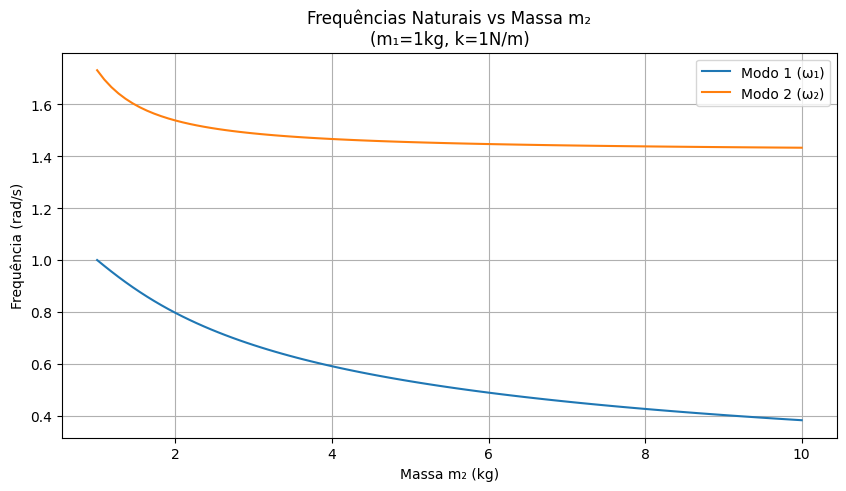

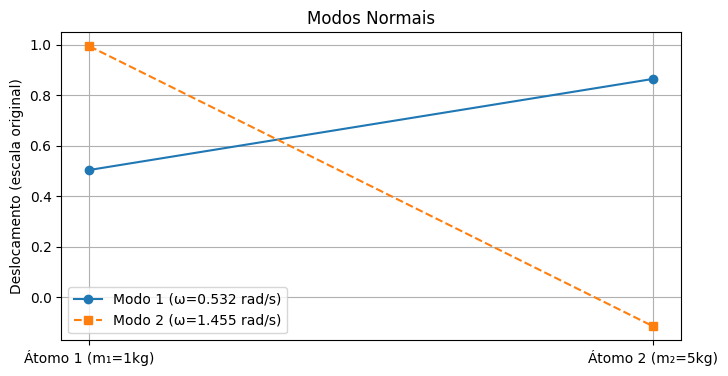

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def sistema_2atomos_periodico(m2, k=1.0):
    """
    Calcula frequências e modos normais para 2 átomos com condições periódicas.
    Retorna:
        frequencias: array com as frequências naturais (rad/s)
        modos: matriz com os modos normais 
    """
    m1 = 1.0  # Massa fixa
    
    # Matriz dinâmica (condições periódicas)
    D = np.array([
        [2*k/m1, -k/m1],
        [-k/m2,  2*k/m2]
    ])
    
    # Calcula autovalores e autovetores
    autovalores, autovetores = np.linalg.eig(D)
    
    # Ordena por frequência crescente
    idx = np.argsort(autovalores)
    frequencias = np.sqrt(np.abs(autovalores[idx]))
    modos = autovetores[:, idx]  # Modos sem normalização
    
    return frequencias, modos

# Exemplo para m2 = 5 kg
frequencias, modos = sistema_2atomos_periodico(m2=5.0)
print("Frequências naturais (rad/s):", frequencias)
print("Modos normais:\n", modos)

# Gráfico das frequências para m2 variando de 1 a 10 kg
m2_vals = np.linspace(1, 10, 100)
freqs = np.array([sistema_2atomos_periodico(m2)[0] for m2 in m2_vals])

plt.figure(figsize=(10, 5))
plt.plot(m2_vals, freqs[:, 0], label='Modo 1 (ω₁)')
plt.plot(m2_vals, freqs[:, 1], label='Modo 2 (ω₂)')
plt.xlabel('Massa m₂ (kg)')
plt.ylabel('Frequência (rad/s)')
plt.title('Frequências Naturais vs Massa m₂\n(m₁=1kg, k=1N/m)')
plt.legend()
plt.grid(True)
plt.show()

# Visualização dos modos para m2 = 5 kg (escala original)
plt.figure(figsize=(8, 4))
plt.plot([1, 2], modos[:, 0], 'o-', label=f'Modo 1 (ω={frequencias[0]:.3f} rad/s)')
plt.plot([1, 2], modos[:, 1], 's--', label=f'Modo 2 (ω={frequencias[1]:.3f} rad/s)')
plt.xticks([1, 2], ['Átomo 1 (m₁=1kg)', f'Átomo 2 (m₂=5kg)'])
plt.ylabel('Deslocamento (escala original)')
plt.title('Modos Normais')
plt.legend()
plt.grid(True)
plt.show()


Configuração: m1=1.0kg, m2=1.0kg, m3=1.0kg
Frequências: [0.     1.7321 1.7321]
Modos normais (colunas são os modos normalizados):
[[-0.5774  0.8165  0.2933]
 [-0.5774 -0.4082 -0.8066]
 [-0.5774 -0.4082  0.5133]]


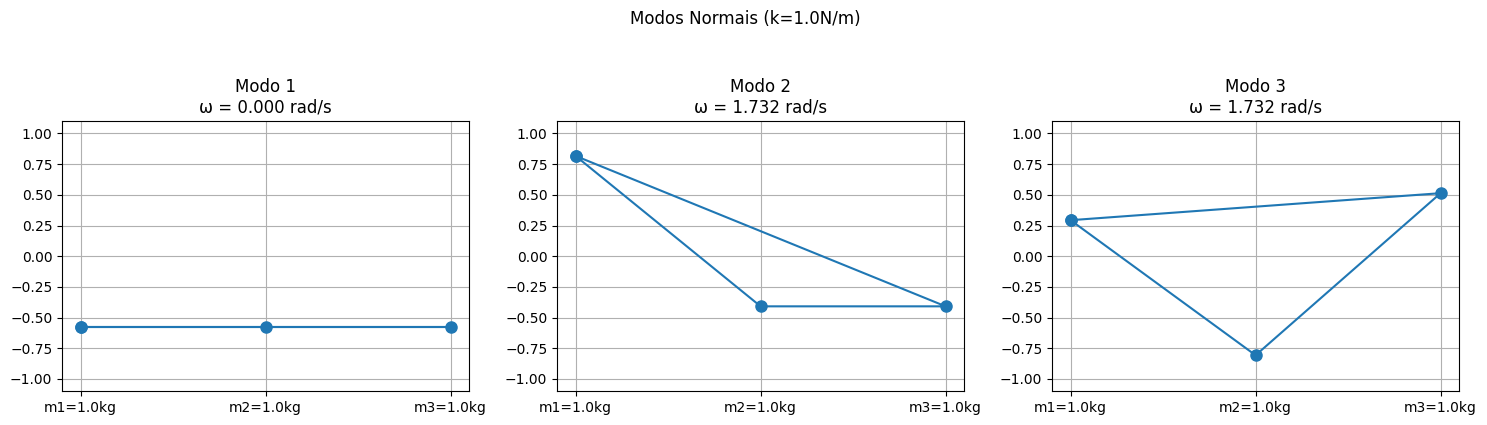


Configuração: m1=1.0kg, m2=2.0kg, m3=1.0kg
Frequências: [0.     1.4142 1.7321]
Modos normais (colunas são os modos normalizados):
[[ 0.5774  0.5774  0.7071]
 [ 0.5774 -0.5774  0.    ]
 [ 0.5774  0.5774 -0.7071]]


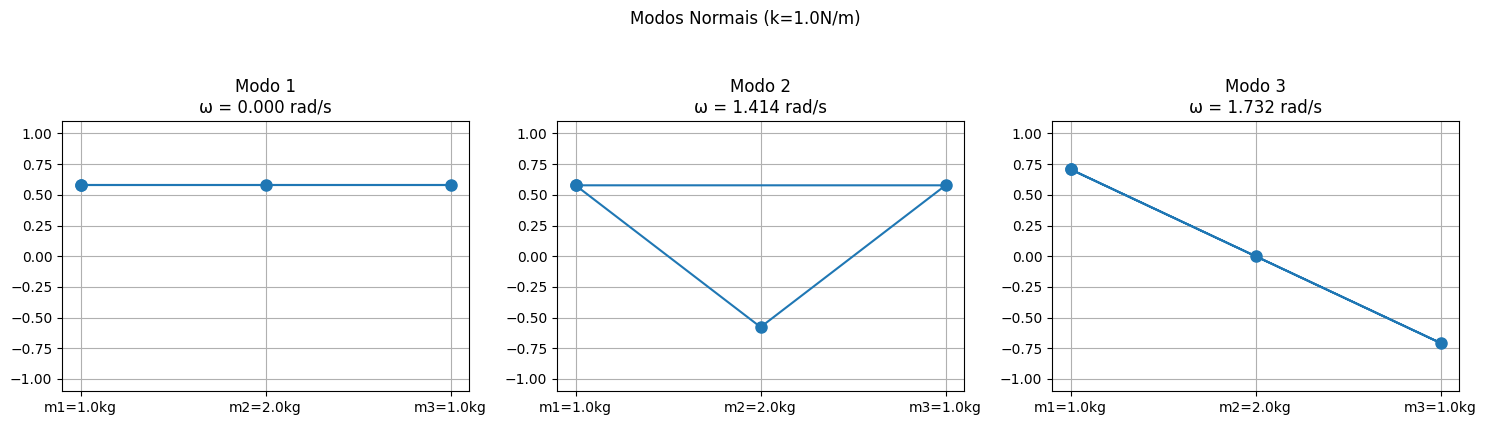


Configuração: m1=1.0kg, m2=2.0kg, m3=3.0kg
Frequências: [0.     1.1101 1.5602]
Modos normais (colunas são os modos normalizados):
[[ 0.5774 -0.2335 -0.9496]
 [ 0.5774 -0.7713  0.2875]
 [ 0.5774  0.5921  0.1249]]


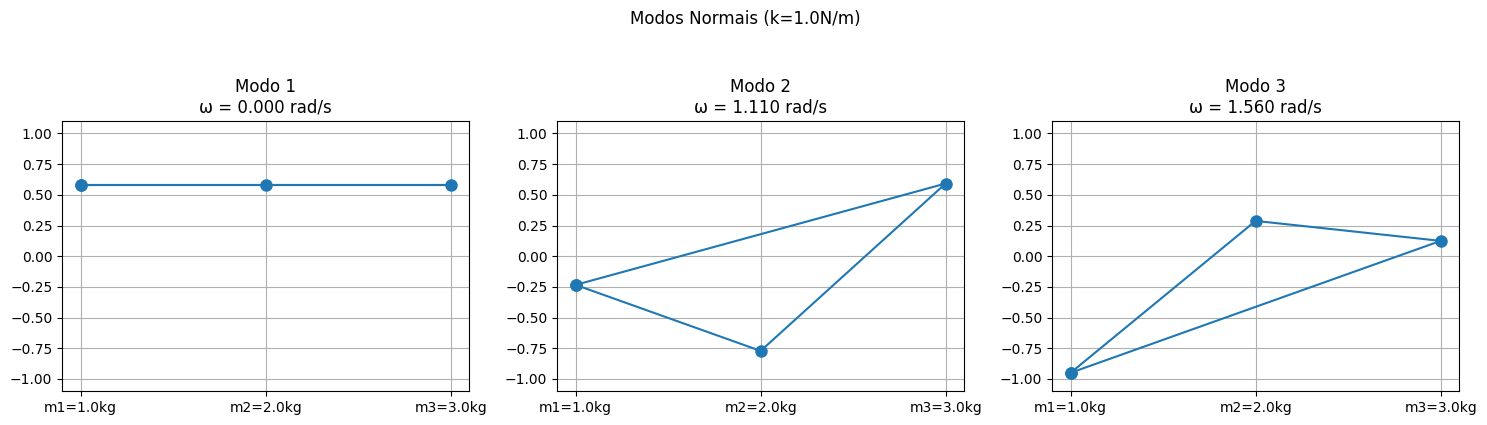

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def matriz_dinamica_3atomos(m1, m2, m3, k):
    """Matriz dinâmica para 3 átomos com condições periódicas"""
    return np.array([
        [2*k/m1, -k/m1, -k/m1],
        [-k/m2, 2*k/m2, -k/m2],
        [-k/m3, -k/m3, 2*k/m3]
    ])

def calcula_frequencias_modos(m1, m2, m3, k):
    """Calcula frequências e modos normais com vetores normalizados"""
    D = matriz_dinamica_3atomos(m1, m2, m3, k)
    autovalores, autovetores = np.linalg.eig(D)

    # Tratamento numérico
    autovalores = np.real(autovalores)
    autovetores = np.real(autovetores)

    # Ordena por autovalor crescente
    idx = np.argsort(autovalores)
    frequencias = np.sqrt(np.abs(autovalores[idx]))
    modos = autovetores[:, idx]

    # Normalização: cada vetor tem norma 1
    for i in range(modos.shape[1]):
        modos[:, i] /= np.linalg.norm(modos[:, i])

    return frequencias, modos

def visualizar_modos(m1, m2, m3, k):
    freq, modos = calcula_frequencias_modos(m1, m2, m3, k)
    
    print(f"\nConfiguração: m1={m1}kg, m2={m2}kg, m3={m3}kg")
    print("Frequências:", np.round(freq, 4))
    print("Modos normais (colunas são os modos normalizados):")
    print(np.round(modos, 4))
    
    plt.figure(figsize=(15, 4))
    for i in range(3):
        plt.subplot(1, 3, i+1)
        modo_circular = np.append(modos[:,i], modos[0,i])
        plt.plot([1, 2, 3, 1], modo_circular, 'o-', markersize=8)
        plt.title(f'Modo {i+1}\nω = {freq[i]:.3f} rad/s')
        plt.xticks([1, 2, 3], [f'm1={m1}kg', f'm2={m2}kg', f'm3={m3}kg'])
        plt.ylim(-1.1, 1.1)
        plt.grid(True)
    plt.suptitle(f'Modos Normais (k={k}N/m)', y=1.05)
    plt.tight_layout()
    plt.show()

# Testes dos casos
visualizar_modos(1.0, 1.0, 1.0, 1.0)
visualizar_modos(1.0, 2.0, 1.0, 1.0)
visualizar_modos(1.0, 2.0, 3.0, 1.0)


=== RESULTADOS CONSISTENTES COM 2 ÁTOMOS ===

1. Massas iguais (1kg, 1kg, 1kg):

Configuração: m1=1.0kg, m2=1.0kg, m3=1.0kg
Frequências: [0.     1.7321 1.7321]
Modos normais (colunas são os modos):
[[-1.      1.      0.3636]
 [-1.     -0.5    -1.    ]
 [-1.     -0.5     0.6364]]


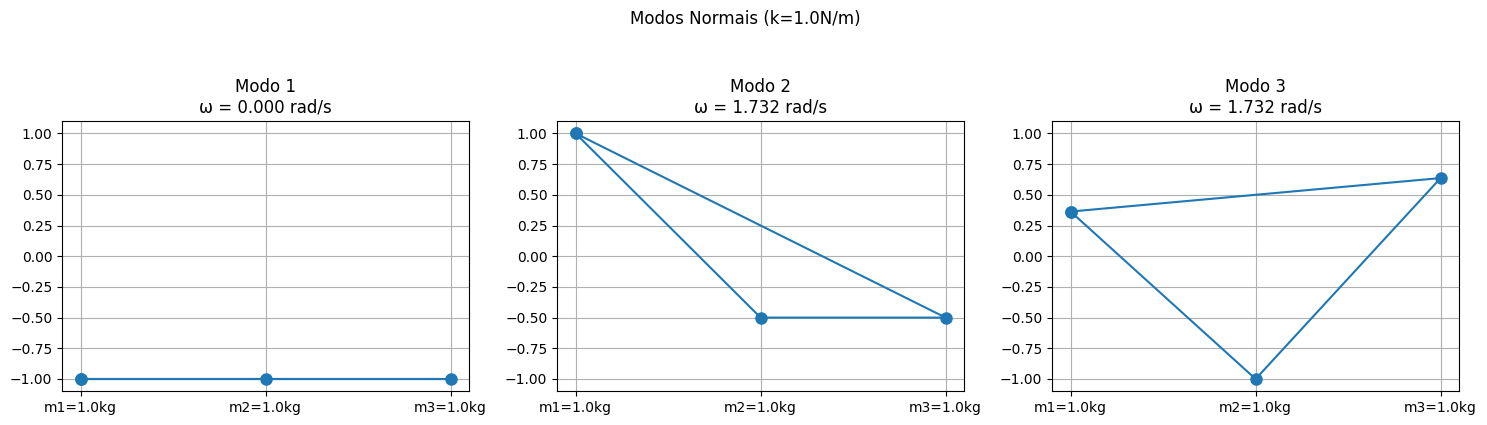


2. Uma massa diferente (1kg, 2kg, 1kg):

Configuração: m1=1.0kg, m2=2.0kg, m3=1.0kg
Frequências: [0.     1.4142 1.7321]
Modos normais (colunas são os modos):
[[ 1.  1.  1.]
 [ 1. -1.  0.]
 [ 1.  1. -1.]]


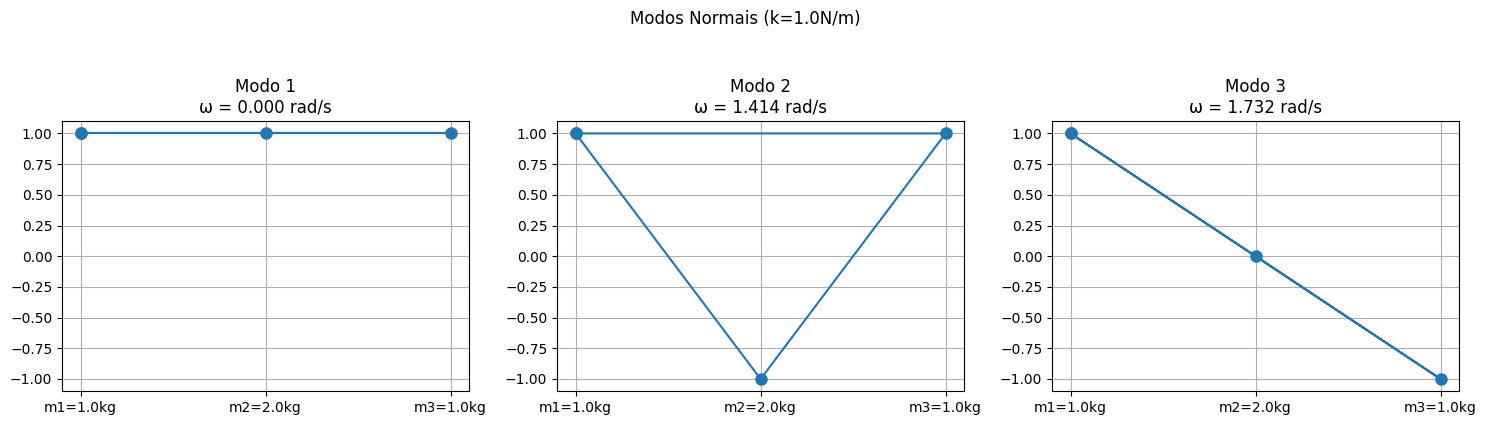


3. Todas massas diferentes (1kg, 2kg, 3kg):

Configuração: m1=1.0kg, m2=2.0kg, m3=3.0kg
Frequências: [0.     1.1101 1.5602]
Modos normais (colunas são os modos):
[[ 1.     -0.3028 -1.    ]
 [ 1.     -1.      0.3028]
 [ 1.      0.7676  0.1315]]


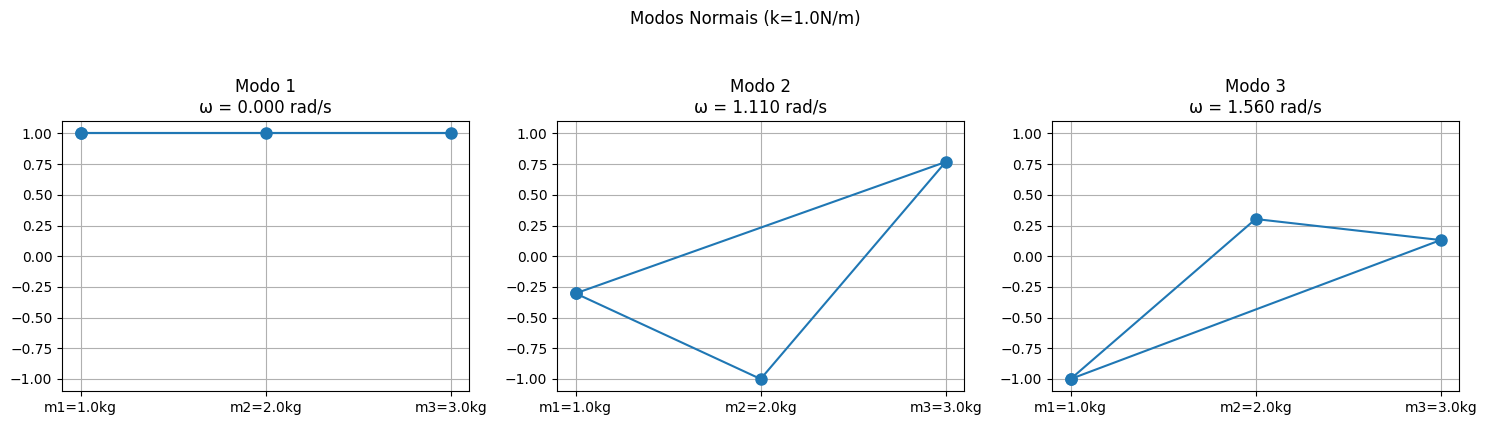

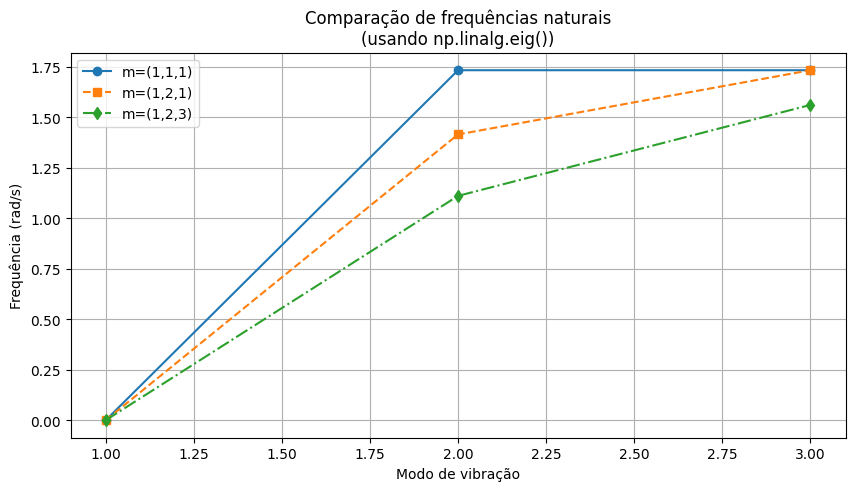

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def matriz_dinamica_3atomos(m1, m2, m3, k):
    """Matriz dinâmica para 3 átomos com condições periódicas"""
    return np.array([
        [2*k/m1, -k/m1, -k/m1],
        [-k/m2, 2*k/m2, -k/m2],
        [-k/m3, -k/m3, 2*k/m3]
    ])

def calcula_frequencias_modos(m1, m2, m3, k):
    """Calcula frequências e modos normais usando np.linalg.eig()"""
    D = matriz_dinamica_3atomos(m1, m2, m3, k)
    autovalores, autovetores = np.linalg.eig(D)
    
    # Remove pequenas partes imaginárias (devido a erros numéricos)
    autovalores = np.real(autovalores)
    autovetores = np.real(autovetores)
    
    # Ordena por frequência crescente
    idx = np.argsort(autovalores)
    frequencias = np.sqrt(np.abs(autovalores[idx]))
    modos = autovetores[:, idx]
    
    # Normaliza os modos
    modos = modos / np.max(np.abs(modos), axis=0)
    
    return frequencias, modos

def visualizar_modos(m1, m2, m3, k):
    freq, modos = calcula_frequencias_modos(m1, m2, m3, k)
    
    print(f"\nConfiguração: m1={m1}kg, m2={m2}kg, m3={m3}kg")
    print("Frequências:", np.round(freq, 4))
    print("Modos normais (colunas são os modos):")
    print(np.round(modos, 4))
    
    plt.figure(figsize=(15, 4))
    for i in range(3):
        plt.subplot(1, 3, i+1)
        modo_circular = np.append(modos[:,i], modos[0,i])
        plt.plot([1, 2, 3, 1], modo_circular, 'o-', markersize=8)
        plt.title(f'Modo {i+1}\nω = {freq[i]:.3f} rad/s')
        plt.xticks([1, 2, 3], [f'm1={m1}kg', f'm2={m2}kg', f'm3={m3}kg'])
        plt.ylim(-1.1, 1.1)
        plt.grid(True)
    plt.suptitle(f'Modos Normais (k={k}N/m)', y=1.05)
    plt.tight_layout()
    plt.show()

# Análise para diferentes casos
print("=== RESULTADOS CONSISTENTES COM 2 ÁTOMOS ===")

# Caso 1: Todas massas iguais (deveria ter um modo zero e dois degenerados)
print("\n1. Massas iguais (1kg, 1kg, 1kg):")
freq1, modos1 = calcula_frequencias_modos(1.0, 1.0, 1.0, 1.0)
visualizar_modos(1.0, 1.0, 1.0, 1.0)

# Caso 2: Uma massa diferente (simetria quebrada)
print("\n2. Uma massa diferente (1kg, 2kg, 1kg):")
freq2, modos2 = calcula_frequencias_modos(1.0, 2.0, 1.0, 1.0)
visualizar_modos(1.0, 2.0, 1.0, 1.0)

# Caso 3: Todas massas diferentes
print("\n3. Todas massas diferentes (1kg, 2kg, 3kg):")
freq3, modos3 = calcula_frequencias_modos(1.0, 2.0, 3.0, 1.0)
visualizar_modos(1.0, 2.0, 3.0, 1.0)

# Gráfico comparativo
plt.figure(figsize=(10, 5))
plt.plot([1, 2, 3], freq1, 'o-', label='m=(1,1,1)')
plt.plot([1, 2, 3], freq2, 's--', label='m=(1,2,1)')
plt.plot([1, 2, 3], freq3, 'd-.', label='m=(1,2,3)')
plt.xlabel('Modo de vibração')
plt.ylabel('Frequência (rad/s)')
plt.title('Comparação de frequências naturais\n(usando np.linalg.eig())')
plt.legend()
plt.grid(True)
plt.show()